# **Importing Packages**

In [ ]:
!pip install "pandas == 2.0.3"
!pip install "numpy == 1.25.2"
!pip install "plotly == 5.15.0"
!pip install "statsmodels.api == 0.14.2"
!pip install "matplotlib == 3.7.1"
!pip install "itertools == 3.10.12"
!pip install "networkx == 3.1"
!pip install "seaborn == 0.13.1"
!pip install "community == 1.0.0b1"
!pip install "sklearn == 1.2.2"

  Using cached plotly-5.15.0-py2.py3-none-any.whl.metadata (7.0 kB)
Using cached plotly-5.15.0-py2.py3-none-any.whl (15.5 MB)
ERROR: Could not find a version that satisfies the requirement statsmodels.api==0.14.2 (from versions: none)
ERROR: No matching distribution found for statsmodels.api==0.14.2
ERROR: Could not find a version that satisfies the requirement itertools==3.10.12 (from versions: none)
ERROR: No matching distribution found for itertools==3.10.12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.8 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4
    Uninstalling networkx-3.4:
      Successfully uninstalled networkx-3.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2
ERROR: Ignored the following yanked versions: 0.0.post2
ERROR: C

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
import itertools

def flatten_list(nested_list):
    return list(itertools.chain(*nested_list))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Reading Data**

In [ ]:
# Read Cryptocurrency data
data_crypto = pd.read_csv("data/crypto_30min_filled_missing_value(ffill).csv")
data_crypto = data_crypto.set_index("date")

# Read Stock data
data_stock = pd.read_csv("data/stock_30min_official_trading_filled_missing(ffill).csv")
data_stock = data_stock.set_index("date")

# Read US ETF data
data_index = pd.read_csv("data/etfs_filled.csv").drop(columns = ["Unnamed: 0"])
remove_assets = ["GOVT","IEF", "IEI", "UVXY", "VIXM", "VIXY","VXX"] # do not use these ETFs
data_index = data_index.drop(columns = remove_assets)
data_index = data_index.set_index("date")

In [ ]:
# Merge all data together
data_merge = pd.concat([data_stock,data_crypto,data_index], axis = 1).dropna()

**Convert prices to returns**

In [ ]:
# Find log-returns
names = data_merge.columns
numpy_data = data_merge.to_numpy()
original = numpy_data[:-1]
onelag = numpy_data[1:]
logreturns = np.log(onelag) - np.log(original)

return_data = pd.DataFrame(data = logreturns, columns = names)
return_data["date"] = data_merge.index[1:]
return_data = return_data.set_index(['date'])


In [ ]:
return_data_rm_UST = return_data.drop(columns = ["UST"]) # For the Ukraine-Russia period, as UST was no longer available at this time
names_rm_UST = return_data_rm_UST.columns

In [ ]:
# Calculate the market return at each time point, i.e. the average return of all assets
market_return = pd.DataFrame(return_data.mean(axis=1), columns = ["mean market return"])
market_return.index = return_data.index

In [ ]:
fig_market_return = px.line(market_return, x='date', y= "mean market return", title='30-min market return (crypto_stock_etf)')

In [ ]:
fig_market_return

In [ ]:
num_assets = len(names)
market_return_repeat = pd.concat([market_return] * num_assets, axis=1, ignore_index=True)
market_return_repeat.columns = return_data.columns

In [ ]:
market_return_repeat

,AAPL,ABBV,ABB,ABT,ACN,ADBE,ADI,ADP,AIR,ALV,...,ROBT,RPG,RPV,SLYG,SLYV,SLY,SOXX,SPY,SVXY,XTN
date,,,,,,,,,,,,,,,,,,,,,
2019-04-01 10:00:00,0.000802,0.000802,0.000802,0.000802,0.000802,0.000802,0.000802,0.000802,0.000802,0.000802,...,0.000802,0.000802,0.000802,0.000802,0.000802,0.000802,0.000802,0.000802,0.000802,0.000802
2019-04-01 10:30:00,0.000579,0.000579,0.000579,0.000579,0.000579,0.000579,0.000579,0.000579,0.000579,0.000579,...,0.000579,0.000579,0.000579,0.000579,0.000579,0.000579,0.000579,0.000579,0.000579,0.000579
2019-04-01 11:00:00,0.000068,0.000068,0.000068,0.000068,0.000068,0.000068,0.000068,0.000068,0.000068,0.000068,...,0.000068,0.000068,0.000068,0.000068,0.000068,0.000068,0.000068,0.000068,0.000068,0.000068
2019-04-01 11:30:00,-0.000280,-0.000280,-0.000280,-0.000280,-0.000280,-0.000280,-0.000280,-0.000280,-0.000280,-0.000280,...,-0.000280,-0.000280,-0.000280,-0.000280,-0.000280,-0.000280,-0.000280,-0.000280,-0.000280,-0.000280
2019-04-01 12:00:00,0.000126,0.000126,0.000126,0.000126,0.000126,0.000126,0.000126,0.000126,0.000126,0.000126,...,0.000126,0.000126,0.000126,0.000126,0.000126,0.000126,0.000126,0.000126,0.000126,0.000126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-03 13:30:00,-0.000337,-0.000337,-0.000337,-0.000337,-0.000337,-0.000337,-0.000337,-0.000337,-0.000337,-0.000337,...,-0.000337,-0.000337,-0.000337,-0.000337,-0.000337,-0.000337,-0.000337,-0.000337,-0.000337,-0.000337
2023-05-03 14:00:00,0.000553,0.000553,0.000553,0.000553,0.000553,0.000553,0.000553,0.000553,0.000553,0.000553,...,0.000553,0.000553,0.000553,0.000553,0.000553,0.000553,0.000553,0.000553,0.000553,0.000553
2023-05-03 14:30:00,-0.001015,-0.001015,-0.001015,-0.001015,-0.001015,-0.001015,-0.001015,-0.001015,-0.001015,-0.001015,...,-0.001015,-0.001015,-0.001015,-0.001015,-0.001015,-0.001015,-0.001015,-0.001015,-0.001015,-0.001015


# **Herding Detection**



---


We use the Cross-Sectional Absolute Deviation (CSAD) model to detect the herding behavior in financial markets. This is one of the most well-known herding behavior detection approaches that has been used widely in many studies.

The fundamental idea of this technique is to examine the relationship between the average return (market return) of a set of assets and the dispersion across each asset return (CSAD). A herding signal is pronounced when the market return changes significantly (i.e. the market experiences large fluctuations, either going up or down) while the dispersion between asset returns decreases (i.e. the return movements of different assets become more similar). In this study, we use two forms of the CSAD model for our experiments.
+ $CSAD_t = \beta_0 + \beta_1|r_{m,t}| + \beta_2 r_{m,t}^2 + \epsilon_t$
+ $CSAD_t = \gamma_0 + \gamma_1 D^{up} |r_{m,t}| + \gamma_2 D^{up} r_{m,t}^2 + \gamma_3 D^{down} |r_{m,t}| + \gamma_4 D^{down} r_{m,t}^2 + \zeta_t$

Where $CSAD_t = \sum\limits_{k = 1}^T |r_{i,t} - r_{m,t}| / T$; $r_{i,t}$ is the return of asset $i$ at time $t$; $r_{m,t} = \sum\limits_{k = 1}^{N} r_{k,t} / N $ is the average of asset returns (also known as the market return) at time $t$; $\beta_0, \beta_1, \beta_2, \gamma_0, \gamma_1, \gamma_2, \gamma_3, \gamma_4$ are regression coefficients, $D^{up} = 1$ if $r_{m,t}$ is positive, otherwise $0$; $D^{down} = 1$ if $r_{m,t}$ is negative, otherwise $0$; $\epsilon_t, \zeta_t$ are error terms at time $t$.

Regarding the first equation, a herding exists when the parameter $\beta_2$ is significantly negative (a negative coefficient with a confidence level of at least 90\%). Intuitively, we expect this coefficient to be negative because it follows the idea of the herding behavior, i.e. a dramatic increase or decrease in the market return ($r_{m,t}^2$) coincides with a decline (negative $\beta_2$) in the dispersion between corresponding assets' returns ($CSAD_t$). The second equation refers to a more detailed version of the first one in which we separate the market condition into $\textit{up}$ (i.e. positive market return) and $\textit{down}$ (i.e. non-positive market return) so that the herding can be detected during the $\textit{up}$ and $\textit{down}$ market condition separately, instead of considering all market conditions (i.e. both $\textit{up}$ and $\textit{down}$ equally) as declared in the first form. The use of both forms for herding detection comes from an expectation that there might be periods when herding does not exist when considering both up and down market conditions at the same time but it might be found in the $\textit{up}$ or $\textit{down}$ market condition only. To this end, the same logic of the first equation is applied to the second equation wherein a significantly negative $\gamma_2$ refers to a herding signal during the $\textit{up}$ market condition while a significantly negative $\gamma_3$ refers to a herding signal during the $\textit{down}$ market condition.


---







---


**NOTE: The code below is for the entire data comprising of three types of investment vehicle as described in the paper. If you want to run herding detection on one particular type of investment vehicle only, change the "Reading Data" section at the beginning of this script to that appropriate data**

---



# **Timeline Partition**

+ Pre-Covid-19 : 04/2019 - 12/2019 -> return_data[:2464]

+ Covid-19     : 01/2020 - 06/2020 -> return_data[2464:4089]

+ Bull Time 1: 07/2020 - 1/2021 -> return_data[4089:5988]

+ Bull Time 2: 02/2021 - 08/2021 -> return_data[5988:7912]

+ Bull Time 3: 09/2021 - 23/02/2022 -> return_data[7912:9479]

+ U-R Conflict 1: 24/02/2022 - 09/2022 -> return_data[9479:11455]

+ U-R Conflict 2: 10/2022 - 05/2023 -> return_data[11455:]

# **First Equation**

**Calculating CSAD and other features**

In [ ]:
csad = np.sum(np.abs(return_data - market_return_repeat), axis = 1)/num_assets

In [ ]:
rmt = market_return.values
rmt_abs = np.abs(market_return.values)
rmt_squared = (market_return.values)**2
alpha = np.ones(len(market_return))
variables_csad = pd.DataFrame(data = np.asarray([csad.values, alpha, np.squeeze(rmt), np.squeeze(rmt_abs), np.squeeze(rmt_squared)]).T, columns = ["csad", "alpha", "rmt", "rmt_abs", "rmt_squared"])

In [ ]:
variables_csad.index = market_return.index

**Forming a regression model to estimate the parameters of the herding detection equation**

**Entire Period**

In [ ]:
X = variables_csad[['alpha', 'rmt_abs', 'rmt_squared']]
Y = variables_csad["csad"]

## fit a OLS model with intercept on TV and Radio
#X = sm.add_constant(X)
X = sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   csad   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     6475.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:22:02   Log-Likelihood:                 61810.
No. Observations:               13360   AIC:                        -1.236e+05
Df Residuals:                   13357   BIC:                        -1.236e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
alpha           0.0019   2.64e-05     70.818      0.000       0.002       0.002
rmt_abs         0.8304      0.009     94.108      0.000       0.813       0.848
rmt_squared    -5.2094      0.205    -25.392      0.000      -5.612      -4.807
==============================================================================
Omnibus:                    10504.927   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           424939.119
Skew:                           3.448   Prob(JB):                         0.00
Kurtosis:                      29.754   Cond. No.                     1.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Note: The code below is an example of herding detection where we detect herding behavior during the Pre-Covid-19 sub-period. To work on other sub-periods, please amend the corresponding timeline specification**

**Sub-periods**

In [ ]:
# start - 12/2019
X = variables_csad[['alpha', 'rmt_abs', 'rmt_squared']][:2464]
Y = variables_csad["csad"][:2464]

## fit a OLS model with intercept on TV and Radio
#X = sm.add_constant(X)
X = sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   csad   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1334.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:12:21   Log-Likelihood:                 12115.
No. Observations:                2464   AIC:                        -2.422e+04
Df Residuals:                    2461   BIC:                        -2.421e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
alpha           0.0015   5.21e-05     29.686      0.000       0.001       0.002
rmt_abs         0.9073      0.038     23.798      0.000       0.833       0.982
rmt_squared     4.8517      2.910      1.667      0.096      -0.855      10.559
==============================================================================
Omnibus:                     2001.028   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76540.424
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      29.357   Cond. No.                     8.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Second Equation: CSAD for Up and Down Markets**

In [ ]:
D_up_R_abs = market_return["mean market return"].apply(lambda x: x if x > 0.0 else 0.0)
D_up_R_squared = market_return["mean market return"].apply(lambda x: x**2 if x> 0.0 else 0.0)
D_down_R_abs = market_return["mean market return"].apply(lambda x: np.abs(x) if x < 0.0 else 0.0)
D_down_R_squared = market_return["mean market return"].apply(lambda x: x**2 if x < 0.0 else 0.0)
alpha = np.ones(len(market_return))

variables_csad = pd.DataFrame(data = np.asarray([csad.values, alpha, D_up_R_abs, D_up_R_squared, D_down_R_abs, D_down_R_squared]).T, columns = ["csad", "alpha", "duprabs","duprsquared","ddownrabs","ddownrsquared"])

In [ ]:
variables_csad.index = market_return.index

**Entire Period**

In [ ]:
X = variables_csad[['alpha', 'duprabs', 'duprsquared', 'ddownrabs', 'ddownrsquared']]
Y = variables_csad["csad"]
X = sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   csad   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     3267.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:15:54   Log-Likelihood:                 61840.
No. Observations:               13360   AIC:                        -1.237e+05
Df Residuals:                   13355   BIC:                        -1.236e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
alpha             0.0018   2.69e-05     67.822      0.000       0.002       0.002
duprabs           0.8657      0.014     63.021      0.000       0.839       0.893
duprsquared      -8.6411      0.564    -15.308      0.000      -9.748      -7.535
ddownrabs         0.8532      0.011     79.058      0.000       0.832       0.874
ddownrsquared    -5.1130      0.220    -23.193      0.000      -5.545      -4.681
==============================================================================
Omnibus:                    10379.022   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           399913.333
Skew:                           3.402   Prob(JB):                         0.00
Kurtosis:                      28.925   Cond. No.                     2.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Sub-Period**

In [ ]:
# Pre-Covid-19: start - 12/2019
X = variables_csad[['alpha', 'duprabs', 'duprsquared', 'ddownrabs', 'ddownrsquared']][:2464]
Y = variables_csad["csad"][:2464]
X = sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   csad   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     814.5
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:55:55   Log-Likelihood:                 11693.
No. Observations:                2464   AIC:                        -2.338e+04
Df Residuals:                    2459   BIC:                        -2.335e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
alpha             0.0017   5.99e-05     28.770      0.000       0.002       0.002
duprabs           2.2118      0.081     27.330      0.000       2.053       2.370
duprsquared     -67.9060      9.550     -7.110      0.000     -86.633     -49.179
ddownrabs         2.1459      0.079     27.047      0.000       1.990       2.301
ddownrsquared   -30.0886      7.491     -4.017      0.000     -44.778     -15.399
==============================================================================
Omnibus:                     2316.211   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           147378.700
Skew:                           4.306   Prob(JB):                         0.00
Kurtosis:                      39.896   Cond. No.                     2.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Herding Detection at Community Level**

In [ ]:
# Read the community structure file
community_noise_1 = pd.read_csv("data/louvain_partition/louvain_ped5_withnoise(stock_crypto_etf).csv")
community_noise_1.columns = ["symbol", "group"]
ped_noise_1 = community_noise_1.groupby("group")
ped_noise_dict_1 = {}
for i in ped_noise_1:
  ped_noise_dict_1["group_"+ str(i[1]["group"].values[0])] =i[1]["symbol"].values

NameError: name 'pd' is not defined

In [ ]:
def csad_variables(data_frame):
  market_return = pd.DataFrame(data_frame.mean(axis=1), columns = ["mean market return"])
  market_return["date"] = data_frame.index


  market_return = market_return.set_index("date")
  market_return_repeat = pd.concat([market_return] * len(data_frame.columns), axis=1, ignore_index=True)
  market_return_repeat.columns = data_frame.columns


  csad = np.sum(np.abs(data_frame - market_return_repeat), axis = 1)/len(data_frame.columns)

  rmt = market_return.values
  rmt_abs = np.abs(market_return.values)
  rmt_squared = (market_return.values)**2
  alpha = np.ones(len(market_return))
  variables_csad = pd.DataFrame(data = np.asarray([csad.values, alpha, np.squeeze(rmt), np.squeeze(rmt_abs), np.squeeze(rmt_squared)]).T, columns = ["csad", "alpha", "rmt", "rmt_abs", "rmt_squared"])

  variables_csad.index = market_return.index


  return variables_csad


def csad_up_down_variables(data_frame):
  market_return = pd.DataFrame(data_frame.mean(axis=1), columns = ["mean market return"])
  market_return["date"] = data_frame.index


  market_return = market_return.set_index("date")
  market_return_repeat = pd.concat([market_return] * len(data_frame.columns), axis=1, ignore_index=True)
  market_return_repeat.columns = data_frame.columns


  csad = np.sum(np.abs(data_frame - market_return_repeat), axis = 1)/len(data_frame.columns)

  D_up_R_abs = market_return["mean market return"].apply(lambda x: x if x > 0.0 else 0.0)
  D_up_R_squared = market_return["mean market return"].apply(lambda x: x**2 if x> 0.0 else 0.0)
  D_down_R_abs = market_return["mean market return"].apply(lambda x: np.abs(x) if x < 0.0 else 0.0)
  D_down_R_squared = market_return["mean market return"].apply(lambda x: x**2 if x < 0.0 else 0.0)
  alpha = np.ones(len(market_return))

  variables_csad = pd.DataFrame(data = np.asarray([csad.values, alpha, D_up_R_abs, D_up_R_squared, D_down_R_abs, D_down_R_squared]).T, columns = ["csad", "alpha", "duprabs","duprsquared","ddownrabs","ddownrsquared"])

  variables_csad.index = market_return.index


  return variables_csad


In [ ]:
def csad_calculation(original_data, ped_dict, start, end):
  for i in list(ped_dict.keys()):
    print("Com "+ str(i[6:]) +": ", ped_dict[i])
    sub_frame = original_data[ped_dict[i]][start:end]
    variables_csad = csad_variables(sub_frame)

    X = variables_csad[['alpha', 'rmt_abs', 'rmt_squared']]
    Y = variables_csad["csad"]

    ## fit a OLS model with intercept on TV and Radio
    #X = sm.add_constant(X)
    X = sm.add_constant(X)
    est = sm.OLS(Y, X).fit()
    print(est.summary())



In [ ]:
def csad_up_down_calculation(original_data, ped_dict, start, end):
  for i in list(ped_dict.keys()):
    print("Com "+ str(i[6:]) +": ", ped_dict[i])
    sub_frame = original_data[ped_dict[i]][start:end]
    variables_csad = csad_up_down_variables(sub_frame)

    X = variables_csad[['alpha', 'duprabs', 'duprsquared', 'ddownrabs', 'ddownrsquared']]
    Y = variables_csad["csad"]

    ## fit a OLS model with intercept on TV and Radio
    #X = sm.add_constant(X)
    X = sm.add_constant(X)
    est = sm.OLS(Y, X).fit()
    print(est.summary())



In [ ]:
csad_calculation(return_data, ped_noise_dict_1, None, None)

Com 0:  ['AAPL' 'ADBE' 'AMGN' 'GILD' 'GOOG' 'INTU' 'MSFT' 'SONY' 'TSLA' 'VRTX'
 'FNGU' 'IBB' 'IYW' 'ONEQ' 'QQQ' 'QYLD']
                            OLS Regression Results                            
Dep. Variable:                   csad   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                 1.370e+04
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:32:13   Log-Likelihood:                 64821.
No. Observations:               13360   AIC:                        -1.296e+05
Df Residuals:                   13357   BIC:                        -1.296e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------

In [ ]:
csad_up_down_calculation(return_data, ped_noise_dict_1,  None, None)

Com 0:  ['AAPL' 'ADBE' 'AMGN' 'GILD' 'GOOG' 'INTU' 'MSFT' 'SONY' 'TSLA' 'VRTX'
 'FNGU' 'IBB' 'IYW' 'ONEQ' 'QQQ' 'QYLD']
                            OLS Regression Results                            
Dep. Variable:                   csad   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     7250.
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:32:45   Log-Likelihood:                 65078.
No. Observations:               13360   AIC:                        -1.301e+05
Df Residuals:                   13355   BIC:                        -1.301e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------

# **Visualizing the herding detection results**

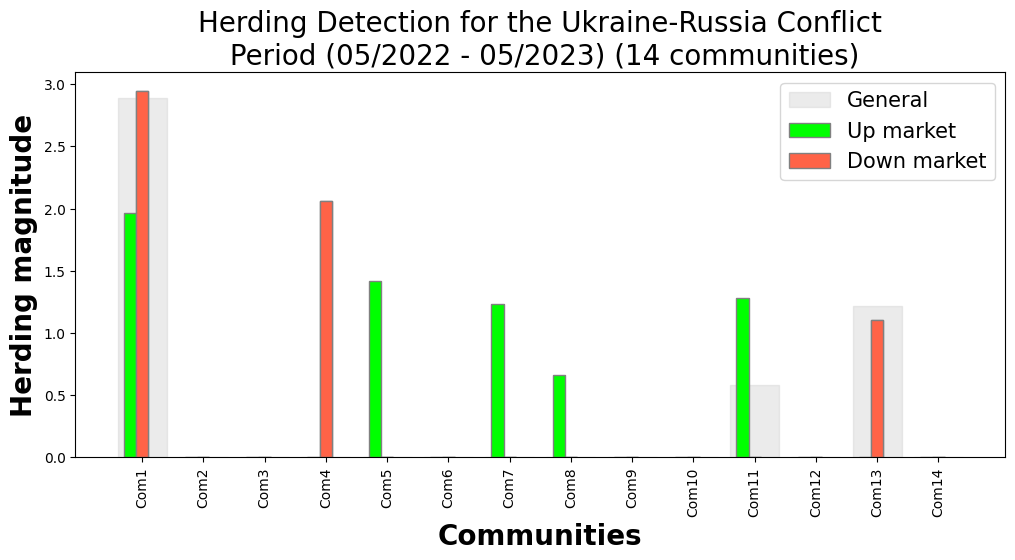

In [ ]:
##################################################### WITH NOISE ###################################################

barWidth = 0.2
fig = plt.subplots(figsize =(12, 5))


# Ped 1
# community_order = ["Com" + str(i) for i in range(1, len(ped_noise_dict_1.keys())+1)]

# Ped 2
# community_order = ["Com" + str(i) for i in range(1, len(ped_noise_dict_1.keys())+1)]

# Ped 3
# community_order = ["Com" + str(i) for i in range(1, len(ped_noise_dict_1.keys())+1)]

# Ped 4
# community_order = ["Com" + str(i) for i in range(1, len(ped_noise_dict_1.keys())+1)]

# Ped 5
community_order = ["Com" + str(i) for i in range(1, len(ped_noise_dict_1.keys())+1)]

##################################################### WITH NOISE  AND VIX -RELATED INDICES ###################################################


# Ped 1

# csad_values = [0,0,0.0, 0.0, -4.572, -4.271, -2.349, -11.419, -3.414, -4.190, -4.959, -6.085, -6.680, 0, -2.078, -2.020, -6.322]
# up_market = [-5.016,0.0, 0.0, 0.0, 0.0,  0.0,-2.272, 0.0, -3.814, -3.584, -9.277, 0.0, 0.0, 0.0, 0.0, -1.950, 0.0]
# down_market = [0.0, 0.0, 0.0, -9.148, -8.786,-4.895, -2.791, -14.016, -3.050, -4.038, -4.193, -6.116, -9.183, -4.532, -3.303, -4.669,-10.403]

#  Ped 2
# csad_values = [-2.658,-4.185, -2.984, -3.007, -1.710, -1.636,-1.275, 0.0, -2.428, -6.184, -4.949, -1.230, -1.927]
# up_market =   [-3.288, -5.458, -4.240, -3.348, -1.839, -2.755, -1.152, -2.760, -3.343, -8.001, -6.637, -2.635, -1.292]
# down_market = [-2.342, -3.580, -2.602, -2.883, -1.498, -1.457, -0.925, 0.0, -2.371,  -6.110, -5.682, -1.013, -2.017]

#  Ped 3
# csad_values = [0.0, -3.962, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.790, 0.0, -1.180, -1.994, 0.0, -1.057, -4.741, 0.0]
# up_market =   [-2.207, -5.510, -6.208, 0.0, 0.0, 0.0, -0.590, 0.0, 0.0,-1.534, 0.0, -1.045, -2.599, 0.0, -1.339,-6.206, 0.0 ]
# down_market = [0.0, -10.268, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.802, 0.0, 0.0, 0.0, 0.0, -1.838, -4.259, -2.933]


# Ped 4
# csad_values = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.539, 0.0, -2.934, 0.0, 0.0, -1.051,  -3.757]
# up_market =   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -8.531, 0.0,-1.313, 0.0,-3.951, 0.0, 0.0, 0.0,  -4.053 ]
# down_market = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.614, 0.0, -2.306, 0.0, 0.0,  -0.682, -3.461 ]


# Ped 5
# csad_values = [0.0, 0.0, 0.0, -0.646, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.583, 0.0, 0.0, -2.886, -2.240 ]
# up_market =   [0.0, 0.0, -2.596, 0.0, 0.0, -1.415, -1.155, -0.664, 0.0, 0.0, -1.284, 0.0, 0.0, -1.967, -2.332]
# down_market = [0.0, 0.0, 0.0, -0.582, -2.059, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.949, 0.0]



############################################### WITH NOISE AND WITHOUT VIX-RELATED INDICES  ############################################################

# Ped 1

# csad_values = [0.0, 0.0, -6.322, 0.0, -4.959, -4.271, -2.349, -11.419, -3.414, -6.680, -6.085, -4.190, 0.0, 0.0, -2.078,  -2.019  ]
# up_market =   [0.0, 0.0, 0.0, 0.0, -9.277, 0.0, -2.272, 0.0,  -3.814, 0.0, 0.0, -3.584, -5.016, 0.0, 0.0, -1.950  ]
# down_market = [0.0, 0.0, -10.403, 0.0, -4.193, -4.895, -2.791, -14.016, -3.050, -9.183, -6.116, -4.038, 0.0, -4.532, -3.303,  -4.669  ]


#  Ped 2
# csad_values = [-2.658, -1.927, -2.984, -4.185, -1.710, -1.636, -6.184, 0.0, -2.428,  -1.275,  -4.945, -1.230, 3.007  ]
# up_market =   [-3.288, -1.292, -4.240, -5.458, -1.839, -2.754, -8.001, -2.760, -3.343, -1.152, -5.522, -2.635, -3.348  ]
# down_market = [-2.342, -2.017, -2.602, -3.580, -1.498, -1.457, -6.110, 0.0, -2.371, -0.925, -4.723, -1.013, -2.883 ]


#  Ped 3

# csad_values = [ 0.0,  -3.962, 0.0, 0.0, 0.0, 0.0, -1.228, 0.0, 0.0, 0.0, 0.0, -1.180,  -3.058, 0.0,  -1.057, -1.994]
# up_market =   [ 0.0, -5.510, -6.208, 0.0, 0.0, 0.0, -1.386, -2.207, 0.0, 0.0, 0.0, -1.045,-3.212, 0.0, -1.339, -2.599  ]
# down_market = [ -2.933, -10.268, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.848, 0.0,  -1.838, 0.0 ]


# Ped 4

# csad_values = [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.249, 0.0, -1.539, 0.0, -2.934, 0.0, -2.059, 0.0,  0.0]
# up_market =   [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -10.235, 0.0, -1.313, 0.0, -3.951, 0.0,  -2.221, 0.0, 0.0 ]
# down_market = [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.614, 0.0, -2.306, 0.0, -1.691, 0.0, -1.368 ]


# Ped 5

csad_values = [-2.886, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.583, 0.0,  -1.216, 0.0  ]
up_market =   [-1.967, 0.0, 0.0, 0.0, -1.415, 0.0, -1.233, -0.664, 0.0, 0.0, -1.284, 0.0, 0.0, 0.0 ]
down_market = [-2.949, 0.0, 0.0, -2.059, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.104, 0.0  ]



############################################### ENTIRE PERIOD WITH NOISE ###############################################
# csad_values = [0.0, -2.422, -1.821, -2.6917, -1.456, -1.475, 0.0,  0.0, -1.079, -1.757, -2.689, -1.892, 0.0]
# up_market = [-0.616, -1.660, -1.298, -3.728, -1.369, -1.485, 0.0, 0.0, 0.0, -1.805, -1.533, -2.298, -1.51]
# down_market = [0.0, -2.444, -1.846, -2.598, -1.437, -1.396, 0.0, 0.0, -1.016, -1.398, -2.470, -1.722, 0.0]


# Set position of bar on X axis
br1 = np.arange(len(up_market))
br2 = [x + barWidth for x in br1]
# br3 = [x + barWidth for x in br2]

shade_width = 0.03
count = 0


barvector = plt.bar(br2, np.abs(down_market), color ='tomato', width = barWidth,
		edgecolor ='grey')

for bar in barvector:
    plt.fill_between([bar.get_x() - 10*shade_width, bar.get_x() + barWidth + 10*shade_width],
                     0, np.abs(csad_values[count]), color='silver', alpha=0.3)
    # plt.fill_between([bar.get_x() - shade_width, bar.get_x() + barWidth + shade_width],
    #                  csad_values[count], csad_values[count] + 1, color='gray', alpha=0.1)
    count = count + 1
    # if count == len(br1):
    #   plt.fill_between([bar.get_x() - 10*shade_width, bar.get_x() + barWidth + 10*shade_width],
    #                  0, np.abs(csad_values[count-1]), color='whitesmoke', alpha=0.3, label = "General")

plt.fill_between([0,0],
                      0, 0, color='silver', alpha=0.3, label = "General")

# Make the plot
plt.bar(br1, np.abs(up_market), color ='lime', width = barWidth,
		edgecolor ='grey', label ='Up market')
barvector = plt.bar(br2, np.abs(down_market), color ='tomato', width = barWidth,
		edgecolor ='grey', label ='Down market')
# plt.bar(br3, np.abs(csad_values), color ='b', width = barWidth,
#  		edgecolor ='grey', label ='CSAD')


# Adding Xticks
plt.xlabel('Communities', fontweight ='bold', fontsize = 20)
plt.ylabel('Herding magnitude', fontweight ='bold', fontsize = 20)
plt.xticks([r + barWidth for r in range(len(up_market))], community_order, rotation = 90)

plt.legend(fontsize = 15)
plt.title("Herding Detection for the Ukraine-Russia Conflict\n Period (05/2022 - 05/2023) (14 communities)", fontsize = 20)
plt.savefig("herding_communitywise_withnoise_ped5.tiff", format = "tiff", dpi = 300, bbox_inches='tight',pad_inches = 0.1)

plt.savefig("herding_communitywise_withnoise_ped5.png", dpi = 300,  bbox_inches='tight',pad_inches = 0.1)


# **Sectors Distribution in Each Community**

In [ ]:
asset_cate = pd.read_excel("data/stock_category.xlsx")

In [ ]:
def distribution_sectors(asset_cate1, community_nonoise_1, text, ped, isnoise):
  dict_sectors = dict()
  key_sectors = list(set(asset_cate1["Sectors"]))

  dict_sectors.update({key: [0]*len(community_nonoise_1.groupby(by = "group")) for key in key_sectors})

  ped_nonoise_1 = community_nonoise_1.groupby("group")
  ped_nonoise_dict_1 = {}
  for i in ped_nonoise_1:
    ped_nonoise_dict_1["group_"+ str(i[1]["group"].values[0])] =i[1]["symbol"].values


  inx = 0
  for gr in ped_nonoise_dict_1:
    comm = pd.DataFrame(data = ped_nonoise_dict_1[gr], columns = ["Stocks"])

    comm_merge = pd.merge(comm,asset_cate1, on = "Stocks" )

    count = []
    percentage_sector = {}
    for i in comm_merge.groupby(by ="Sectors"):
      percentage_sector[i[1].values[0][1]] = i[1]["Stocks"].count()
      count.append(i[1]["Stocks"].count())

    for s in percentage_sector:
      percentage_sector[s] = percentage_sector[s]/np.sum(count)
      dict_sectors[s][inx]= percentage_sector[s]

    #print(percentage_sector)

    inx = inx +1

  df = pd.DataFrame.from_dict(dict_sectors)

  sector_colors = {"Real Estate":0, "Consumer Discretionary": 1,"Financials":2, "Information Technology": 3, "Crypto": 4,
                  "US ETF":5, "Materials":6, "Industrials":7, "Healthcare":8, "Consumer Staples":9, "Energy":10,
                  "Utilities": 11}

  comm_symbols = ["Com " +str(i+1) for i in range(inx)]
  print("number of communities: ", comm_symbols)
  # comm_symbols = ["Com 1", "Com 2", "Com 3", "Com 4", "Com 5", "Com 6", "Com 7","Com 8",
  #                 "Com 9","Com 10","Com 11","Com 12"]


  num_partitions = {}


  comm_part = pd.DataFrame.from_dict(dict_sectors)
  comm_part = comm_part>0.0
  comm_part_sum = comm_part.sum(axis =1)

  for i in range(len(comm_part)):
    num_partitions[str(i)] = comm_part_sum.iloc[i]


  # Assuming you have a DataFrame named df with 10 columns and 12 rows
  # Replace this with your actual DataFrame

  # Example DataFrame creation (replace this with your actual DataFrame)


  data = dict_sectors
  df = pd.DataFrame.from_dict(data)
  #df = final_df
  # Set up the figure and axis
  plt.subplots(figsize =(15,5))

  colors = ['maroon', 'olive', 'teal', 'navy', 'orange', 'cyan', 'magenta', 'purple',
            'yellow', 'red', 'lime', 'green']
  # Plot non-zero values for each row with dashed horizontal lines
  non_zero_values = []
  for index, row in df.iterrows():
    plt.axvline(index -0.06 +0.25*index, ls ='--', color = 'grey')
    non_zero_values.append([(col, val,index) for col, val in zip(df.columns, row) if val != 0])
    # ordered non_zero_values here
  plt.axvline(len(df) -0.06 +0.25*len(df), ls ='--', color = 'grey')
  non_zero_values = flatten_list(non_zero_values)
  non_zero_values.sort(key = lambda x: x[0])
  #print(non_zero_values)
  for col, val, index in non_zero_values:
      print(index)
      x_values = np.linspace(index*1.25, index*1.25 + val/1.05,1000) #////////////////////////
      if num_partitions[str(index)] == 1:
        x_values = np.linspace(index*1.25, index*1.25 + val*1.1,1000)
      y_values = [col] * len(x_values)
      print(y_values)
      #print(col)
      plt.plot(x_values, y_values, color= colors[sector_colors[col]], linestyle='-', linewidth = 6)

  # Set the axis labels
  plt.xlabel('Communities',  fontweight ='bold', fontsize = 20)

  x = [i*1.25 + 0.55 for i in range(len(df))]
  my_xticks = comm_symbols
  plt.xticks(x, my_xticks, rotation = 90)
  plt.ylabel('Sectors', fontweight ='bold', fontsize = 20)
  # Ukraine-Russia Conflict
  plt.title("Distribution of Financial Sectors in each Community throughout the Entire Period", fontsize =  17)
  # Display the chart
  plt.savefig("dist_sectors_"+ ped+ "_" + isnoise +".png", dpi = 300, bbox_inches='tight',pad_inches = 0.1)
  plt.savefig("dist_sectors_"+ ped+ "_" + isnoise +".tiff", format = "tiff", dpi = 300, bbox_inches='tight',pad_inches = 0.1)


number of communities:  ['Com 1', 'Com 2', 'Com 3', 'Com 4', 'Com 5', 'Com 6', 'Com 7', 'Com 8', 'Com 9', 'Com 10', 'Com 11', 'Com 12', 'Com 13']
0
['Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretio

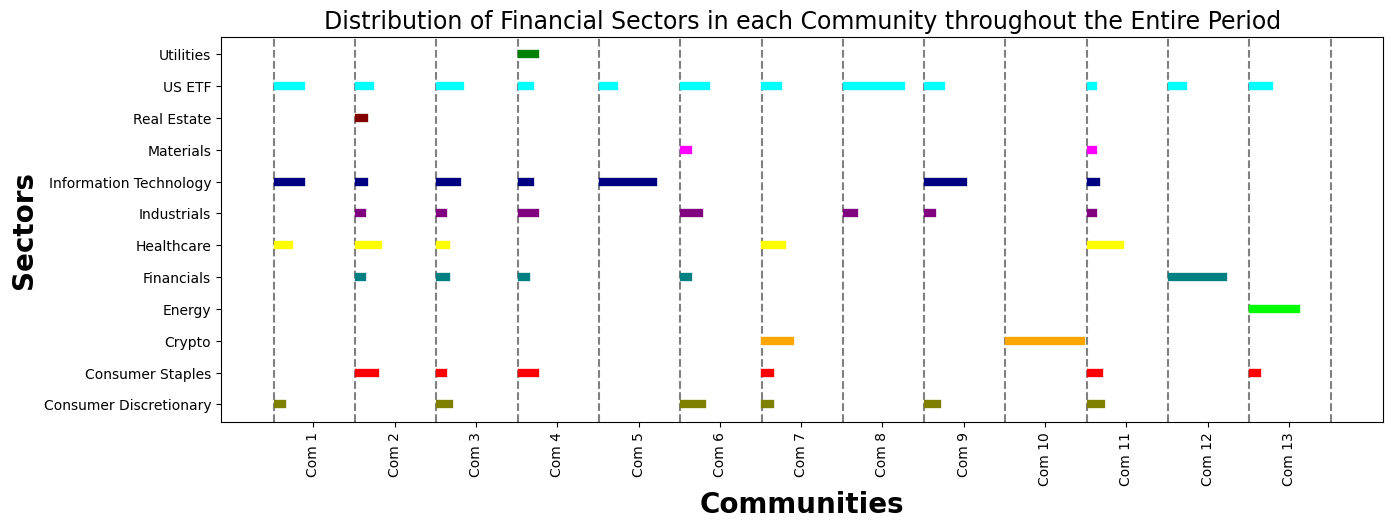

In [ ]:
distribution_sectors(asset_cate, community_noise_1," ", "Entire", "withnoise")
